In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

C:\Users\karth\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Load the data
# Assuming you have a CSV file named 'stock_data.csv' with columns 'Date' and 'Close' representing the stock market data
data = pd.read_csv('stock_data.csv')

In [5]:
# Extract the 'Close' prices
close_prices = data['Close'].values.reshape(-1, 1)

In [6]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(close_prices)

In [7]:
# Define the sequence length for LSTM (how many previous data points the LSTM will use to make predictions)
sequence_length = 100

In [8]:
# Create sequences of data for training
X_train = []
y_train = []
for i in range(sequence_length, len(normalized_data)):
    X_train.append(normalized_data[i-sequence_length:i, 0])
    y_train.append(normalized_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshape the input data to be 3D (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
50/50 [==============================] - 23s 201ms/step - loss: 0.0261
Epoch 2/100
50/50 [==============================] - 10s 194ms/step - loss: 0.0026
Epoch 3/100
50/50 [==============================] - 10s 195ms/step - loss: 0.0023
Epoch 4/100
50/50 [==============================] - 10s 196ms/step - loss: 0.0022
Epoch 5/100
50/50 [==============================] - 10s 194ms/step - loss: 0.0020
Epoch 6/100
50/50 [==============================] - 9s 189ms/step - loss: 0.0017
Epoch 7/100
50/50 [==============================] - 10s 195ms/step - loss: 0.0016
Epoch 8/100
50/50 [==============================] - 10s 195ms/step - loss: 0.0015
Epoch 9/100
50/50 [==============================] - 10s 194ms/step - loss: 0.0013
Epoch 10/100
50/50 [==============================] - 9s 187ms/step - loss: 0.0013
Epoch 11/100
50/50 [==============================] - 10s 195ms/step - loss: 0.0013
Epoch 12/100
50/50 [==============================] - 10s 196ms/step - loss: 0.0013
Epo

In [13]:
# Prepare data for forecasting
last_sequence = close_prices[-sequence_length:]
last_sequence_normalized = scaler.transform(last_sequence.reshape(-1, 1))
X_forecast = last_sequence_normalized[-sequence_length:].reshape(1, -1, 1)

In [14]:
# Make predictions for the next 30 days (you can adjust this value)
forecast_length = 30
predicted_prices = []
for _ in range(forecast_length):
    prediction = model.predict(X_forecast)
    predicted_prices.append(prediction[0, 0])
    X_forecast = np.append(X_forecast[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

1/1 [==============================] - 0s 65ms/step


In [15]:
# Inverse transform the predicted prices to get the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1)).flatten()

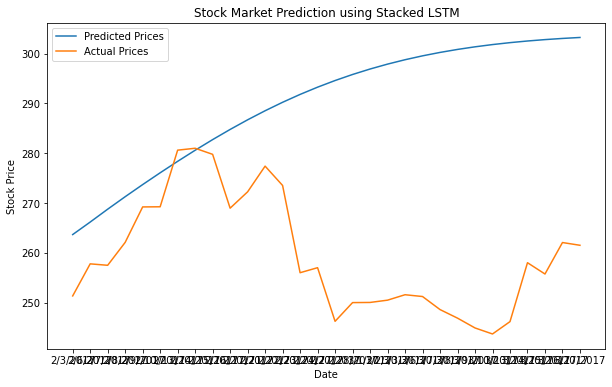

In [16]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][-forecast_length:], predicted_prices, label='Predicted Prices')
plt.plot(data['Date'][-forecast_length:], close_prices[-forecast_length:], label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction using Stacked LSTM')
plt.legend()
plt.show()